## Final Project: DATA604 - Simulations and Modeling
### Author: Christian Thieme 
### Date: 7/14/2020

![eggs](eggs.jpg)

## Introduction - The Problem

Over the past decade, the desire for all natural, fresh, organic food has grown exponentially. Significantly more offerings at grocery stores as well as the abundance of farmer's markets has made access to these foods easier and cheaper. Additionally, more consumers want to know where their food comes from, and where animals are concerned, how they are cared for. As the demand for this type of food increases, many people have wondered about getting into the game themselves, either by growing their own organic produce and selling excess or raising some type of livestock that could be sold down the road. One of the easiest areas to break into is raising laying hens to sell organic eggs. Chickens are fairly cheap to care for and require minimal maintenance. Additionally, you don't need five acres to get a couple chickens. Considering the health of the animals, you can maintain up to 50 chickens on a single acre. Many people just have a few chickens in their backyard. Before jumping in with both feet, many people wonder if they would be able to break even or turn a profit. There are quite a few variables to account for, so just trying to do simple math on the back of a napkin often leads to over confident calculations.   

One of the biggest questions people ask is "How many chickens should I have?". The answer to this question is not as straightforward as you would think. While revenue from selling eggs by the dozen is fairly linear, costs associated with chickens generally more closely resemble stairs, where costs are fairly even to a point and then double. For example, 10 chickens may be fine with one 35lb bag of feed for a month, but the 11th chicken may require you to buy a second bag, essentially doubling your cost on a cash basis for the month. Issues like these are common, which is why I've built this very flexible simulation.    

## The Simulation - How Does it Work?

For the casual hen owner (1-50 chickens) looking to sell eggs, there are really three areas of interest that need to be accounted for:

1. Revenue - How much money do you make from the sale of dozens of eggs? 
2. Feed Cost - The cost of feeding your chickens
3. Bedding Cost - The cost of buying and replacing bedding that periodically gets soiled

We will explore these areas individually below in detail. Before diving in, it is important to know that this simulation is catered for the individual who is casually selling these eggs on the side as extra income and is not geared toward simulating a full-blown egg producing plantation. While one can run this simulation for as many birds as they wish, generally additional costs would be incurred for flocks greater than 50 birds (hiring workers, etc.). Additionally, in the below discussion, I will exclude startup costs, such as purchasing the birds, building a coop, buying feeding stations, etc. However, the simulation is flexible enough that you could add in those costs if you wanted to find where your breakeven is.   

### Revenue

When we look at revenue, there are several items to consider: 
1. How many chickens are in the flock?
2. How many days we want to simulate (i.e. 31 for a month, 90 for a quarter, 365 for year)
3. How much can we sell a dozen organic eggs for?
4. How much does each individual egg carton cost (i.e. $0.23/carton)
5. What is the low and high end of egg production per year for the type of hens you have? Most birds lay between 235 to 275 eggs a year. 

The 5th item above is the tricky piece. Hens generally don't lay an egg every day. As such, there is an associated probability that a hen lays an egg on a given day based on the breed of chicken and the low and high end of egg production per year (i.e. probability = 250/365). This simulation attempts capture that variability by determining a probability a given chicken in a flock will lay an egg on a given day, and allowing that probability to fluctuate between the high end and low end of the chosen egg production as it would in real life. Below is the flow chart of the process followed by the code implementation. 

<img src = "RevenueFlowChart.jpg">

In [238]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

#egg_revenue funtion will be a function that returns the revenue from selling x dozen eggs at x price, laid by x chickens  

def egg_revenue(chickens, days, sale_price, cost_of_carton, yearly_low_end_egg_production, yearly_high_end_egg_production): 
    
    #chickens - number of chickens in the flock
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #sale_price - the price at which you can sell 1 dozen eggs (will vary by location)
    #cost_of_carton - cost of indiviudal egg carton
    #yearly_low_end_egg_production - low end of how many eggs an average chicken lays a year
    #yearly_high_end_egg_production - high end of how many eggs an average chicken lays a year
    
    total_egg_count = []
    
    #total_egg_count will hold the count of eggs laid each day
    #We will take this count, sum it, and then multiply by the
    #price of the eggs to get revenue

    for day in range(days): 
        
    #for loop to loop through each of the days chosen in the input parameter
        
        egg = [0,1]  # egg is setting our outcomes, 0 for no egg, 1 for an egg
        eggs_today = [] # will hold the count of the eggs laid by each chicken in a day

        daily_egg_prob = np.random.uniform(low = yearly_low_end_egg_production, high = yearly_high_end_egg_production,
                                           size = chickens)
        
        #daily_egg_prob uses a uniform distribution to randomly select values between 
        #yearly_low_end_egg_production and yearly_high_end_egg_production, which is 
        #is the interval for how many eggs a chicken lays per year. The size parameter above will be set
        #to select a random sample for every chicken in the flock. Defaul is 235 and 275

        for i in daily_egg_prob: 
            
        #here we loop through the above samples for each chicken and use the sample to calculate
        #a probability that a chicken will lay an egg that day (i.e. p = 275/365)
            
            probabilities = [1-(i/365),(i/365)] #[0] is the outcome where an egg is NOT laid, [1] is an egg is laid
            
            outcome = np.random.choice(egg, size = 1, p= probabilities) 
            
            #based on the probabilities, picks an outcome
            #of an egg or no egg for a day
            
            eggs_today.append(outcome[0]) #adds the outcome for that chicken to the list. 
            
        total_egg_count.append(sum(eggs_today)) #adds the sum of the eggs for a day from each chicken in the flock 

    total_eggs = sum(total_egg_count) #sums all eggs for all days selected in the input parameter
    
    dozen_eggs = total_eggs / 12 #divide by 12 to get how many dozen eggs we can sell
    
    return math.floor(dozen_eggs) * (sale_price - cost_of_carton) 

    #retuns only eggs that fit into a 
    #dozen * sale price of dozen eggs less the cost of the carton
    
    
#egg_revenue(10,365, 4.25, 0.23, 235, 275)

### Feed Cost

When considering feed cost, you must consider: 
1. The number of chickens you need to feed
2. The number of days you are trying to simulate
3. The cost of a single bag of feed
4. How many pounds of feed are in a single bag 
5. How much feed does a single chicken consume on a given day?

Again, the 5th point is the variable piece. Chickens, on average, eat a 1/4 lbs of feed per day. However, as you would expect, a chicken isn't eating exactly a 1/4 lbs each day, there is some variability there. To model this, I take a low and a high range of how much feed a chicken is eating per day and randomly select an amount within this range for each chicken for each day, building in the variability you would find in real life. Then using these amounts and the days being simulated, I can calculate how many pounds of feed are consumed, and ultimately how many bags needed to be purchased and their associated cost. Below is the flow chart of the process followed by the code implementation. 

<img src = "FeedCostFlowChart.jpg">

In [6]:
'''food_consumption function will calculate how much cost is incurred by feeding x amount of birds based on the cost
#of the feed and how many lbs were purchased'''

def food_consumption(chickens, days, bag_of_feed_cost, lbs_of_feed):
    
    #chickens - number of chickens in the flock
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #bag_of_feed_cost - price of a single bag of feed
    #lbs_of_feed - lbs of feed that were purchased from a single bag
    
    food_consumption = np.random.uniform(low = .23, high = .27, size = days*chickens)
    
    # A laying hen will consume between 
    #.23 and .27 lbs of feed per day. This function pulls a sample between .23 and .27 for each chicken for every day 
    #of the simulation allowing us to calculate how many pounds of feed x amount of chickens ate over the selected
    #time period    
    
    bags_of_feed = math.ceil(sum(food_consumption)/lbs_of_feed) 
    
    #food consumed divided by the lbs of feed you purchase to 
    #calculate how many bags of feed were purchased
    
    return round(bags_of_feed * bag_of_feed_cost,2) #returns the cost as bags of feed consumed * cost of the bags

#food_consumption(10,365,23.99,35) 

### Bedding Cost

Similar to feed, bedding costs have several components as well: 
1. How many chickens are in the flock?
2. The number of days to simulate
3. The cost of a single bag of bedding
4. The cubic feet of bedding in a single bag
5. How long does the bedding last before it is soiled?

Bedding, surprisingly, is the most difficult component to model. This is because not only does every bird require a certain amount of bedding (10 cubic feet for every ~25 birds), but the bedding also needs to be changed at a fairly regular interval (generally between 27-31 days) for the health of the birds. Ultimately, I calculate how many bags of bedding are needed for the period being simulated and their associated cost. Below is the flow chart of the process followed by the code implementation. 

<img src = "BeddingCostFlowChart.jpg">

In [7]:
'''bedding_cost function will calculate the cost incurred from having to change the nesting bedding. The function
assumes the bedding needs to be changed every 27-31 days and the number of chickens you have affects how much bedding
you need'''

def bedding_cost(chickens, days, bag_of_bedding_cost, cubic_feet_of_bedding, low_end_days_to_refresh, 
                 high_end_days_to_refresh):
    
    #chickens - number of chickens in the flock
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #bag_of_bedding_cost - price of a single bag of bedding
    #cubic_feet_of_bedding - cubic feed of bedding that were purchased from a single bag of bedding
    #low_end_days_to_refresh - low end of days when bedding needs to be refreshed (i.e. - after 27 days)
    #high_end_days_to_refresh - high end of days when bedding needs to be refreshed (i.e. - after 35 days)
    
    days_to_refresh = math.ceil(np.random.uniform(low = low_end_days_to_refresh, 
                                                  high = high_end_days_to_refresh, size = 1))
        
    #randomly chooses a number between low_end_days_to_refresh 
    # and high_end_days_to_refresh days which is how often the bedding needs to be refreshed
    #default is 27 and 31, respectively
    
    times_to_refresh_bedding = math.ceil(days/days_to_refresh)
    
    #calculates how many times the bedding needed to be 
    #refreshed during the time period entered into for the simulation
        
    chickens_for_10_cubic_feet = math.ceil(np.random.uniform(low = 23, high = 26, size = 1)) 
    
    # selects a random number
    #between 23 and 26, which is the number of chickens that can be provided nesting with 10 cubic feet of bedding
   
    if chickens <= chickens_for_10_cubic_feet: 
        
    #if we less than or equal to the number of chickens randomly selected
    #from above, we won't need to buy an additional bag 
    
        feet_from_chickens = 0 #no additional bag needed
        
    else:
        feet_from_chickens = math.ceil(((10/chickens_for_10_cubic_feet) * chickens)/cubic_feet_of_bedding)
        
        #divide 10 by the number of chickens that 10 cubic feet will provide for to get a rate per bird
        #then multiply that rate by how many chickens are in our simulation
        #finally, divide that amount by how many cubic feet of bedding are in a single bag, to determine how 
        #many bags we need.
   
    return round(bag_of_bedding_cost * (times_to_refresh_bedding + feet_from_chickens),2) #returns cost of bedding
    
#bedding_cost(1, 31, 8.79,10, 27, 31)

## Putting it all Together

At the end of the day we are trying to answer the question, "How many chickens do I need to at least break even or to maximize my profit?". Generally, space will be a limitation for most people. As mentioned before, 50 chickens need about an acre of space for a healthy living environment. With this knowledge, you can work backward to estimate a range of chickens that would work for the space you have and run the simulation over that range to determine the optimal number of chickens to return the greatest profit. When it comes to raising chickens, more is not always better, a single chicken over a certain threshold can cause you to have to buy an extra bag of feed or bedding each month, increasing your costs. 

As there is variability built in to each of the above processes described above, we will run the simulation many times for each value in the given range of chickens so we can see a full range of minimum, maximum, average, and variance values for each option in an effort to make the most informed decision based on our risk tolerance. The function below returns a data frame containing the minimum, maximum, average, and variance for each possible number of chickens in the range given based on the number of simulations run for each possibility. Additionally, a dictionary is returned that has each individual raw value from each run of the simulation so further analysis can be done. 

In [134]:
def chicken_simulation_function(low_end_chickens, high_end_chickens, by_how_many_chickens, days, 
                                sale_price, cost_of_carton, yearly_low_end_egg_production, yearly_high_end_egg_production,
                                bag_of_feed_cost, lbs_of_feed, bag_of_bedding_cost, cubic_feet_of_bedding, 
                                low_end_days_to_refresh, high_end_days_to_refresh, additional_cost,
                                simulations_per_chicken):
    
    #low_end_chickens - low end of the range of chickens you could maintain
    #high_end_chickens- high end of the range of chickens you could maintain
    #by_how_many_chickens - simulate increases of 1,2,3,4, etc. chickens at a time. If you want to run the 
        #simulation for every chicken in the range, subtract the high_end_chickens from the low_end_chickens and 
        #enter the number, otherwise, divide that number by the number you want to increase in each simulation. 
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #sale_price - the price at which you can sell 1 dozen eggs (will vary by location)
    #cost_of_carton - cost of indiviudal egg carton
    #yearly_low_end_egg_production - low end of how many eggs an average chicken lays a year
    #yearly_high_end_egg_production - high end of how many eggs an average chicken lays a year
    #bag_of_feed_cost - price of a single bag of feed
    #lbs_of_feed - lbs of feed that were purchased from a single bag
    #bag_of_bedding_cost - price of a single bag of bedding
    #cubic_feet_of_bedding - cubic feed of bedding that were purchased from a single bag of bedding
    #low_end_days_to_refresh - low end of days when bedding needs to be refreshed (i.e. - after 27 days)
    #high_end_days_to_refresh - high end of days when bedding needs to be refreshed (i.e. - after 35 days)
    #additional_cost - you can enter a value here if you have incremental costs not included in the simulation
    #simulations_per_chicken - how many simulations per chicken should be run (i.e. 100 simulations)
    

    chickens_to_sweep = np.linspace(low_end_chickens,high_end_chickens, by_how_many_chickens)   
    #an array holding the values of the chicken range (i.e. 15-25 chickens)
    
    #lists to hold avg, min, max, and var of the gross profit, revenue, food cost, bedding cost and total cost of the 
    #simulations per chicken
    avg_gross_profit_amounts = []
    avg_revenue_amounts = []
    avg_food_cost_amounts = []
    avg_bed_cost_amounts = []
    avg_total_cost_amounts = []
    
    min_gross_profit_amounts = []
    min_revenue_amounts = []
    min_food_cost_amounts = []
    min_bed_cost_amounts = []
    min_total_cost_amounts = []
    
    max_gross_profit_amounts = []
    max_revenue_amounts = []
    max_food_cost_amounts = []
    max_bed_cost_amounts = []
    max_total_cost_amounts = []
    
    var_gross_profit_amounts = []
    var_revenue_amounts = []
    var_food_cost_amounts = []
    var_bed_cost_amounts = []
    var_total_cost_amounts = []
    
    #dictionaries that will hold the current value of chickens being simulated as the key and the raw values (list)
    #of the simulation  
    gp_dict = dict()
    rev_dict = dict()
    food_dict = dict()
    bed_dict = dict()
    tot_cost_dict = dict()
    
    #sweeps through range of chickens and stores each run of the simulation in its given list: gross profit, 
    #revenue, food cost, bed cost, and total cost
    for n_chickens in chickens_to_sweep:
        gross_profit_amounts = []
        revenue_amounts = []
        food_cost_amounts = []
        bed_cost_amounts = []
        total_cost_amounts = []

        #loops through the desired amount of simulations per chicken
        for i in range(0,simulations_per_chicken):

            chickens = int(n_chickens)
        
            #storing output of egg_revenue function
            revenue = egg_revenue(chickens, days, sale_price, cost_of_carton, yearly_low_end_egg_production,
                                  yearly_high_end_egg_production)
            
            #storing output of food_consumption function
            food_cost = food_consumption(chickens, days, bag_of_feed_cost, lbs_of_feed)
            
            #storing output of bedding_cost function
            bed_cost = bedding_cost(chickens, days, bag_of_bedding_cost, cubic_feet_of_bedding, low_end_days_to_refresh, 
                                    high_end_days_to_refresh)
            
            #calculating total cost
            total_cost = food_cost + bed_cost + additional_cost

            #calculating gross profit and appending to list
            gross_profit = revenue - food_cost - bed_cost - additional_cost
            gross_profit_amounts.append(gross_profit)
            
            #appending revenue, food cost, bed cost, and total cost to respective lists
            revenue_amounts.append(revenue)
            food_cost_amounts.append(food_cost)
            bed_cost_amounts.append(bed_cost)
            total_cost_amounts.append(total_cost)
        
        #dictionaries of values for each chicken
        gp_dict[n_chickens] = gross_profit_amounts
        rev_dict[n_chickens] = revenue_amounts
        food_dict[n_chickens] = food_cost_amounts
        bed_dict[n_chickens] = bed_cost_amounts
        tot_cost_dict[n_chickens] = total_cost_amounts
               
        #lists of the averages
        avg_gross_profit_amounts.append(np.average(gross_profit_amounts)), 
        avg_revenue_amounts.append(np.average(revenue_amounts)),
        avg_food_cost_amounts.append(np.average(food_cost_amounts)),
        avg_bed_cost_amounts.append(np.average(bed_cost_amounts)),
        avg_total_cost_amounts.append(np.average(total_cost_amounts))
        
        #lists of the minimums
        min_gross_profit_amounts.append(min(gross_profit_amounts)), 
        min_revenue_amounts.append(min(revenue_amounts)),
        min_food_cost_amounts.append(min(food_cost_amounts)),
        min_bed_cost_amounts.append(min(bed_cost_amounts)),
        min_total_cost_amounts.append(min(total_cost_amounts))
        
        #lists of the maximums
        max_gross_profit_amounts.append(max(gross_profit_amounts)), 
        max_revenue_amounts.append(max(revenue_amounts)),
        max_food_cost_amounts.append(max(food_cost_amounts)),
        max_bed_cost_amounts.append(max(bed_cost_amounts)),
        max_total_cost_amounts.append(max(total_cost_amounts))
        
        #lists of the variances
        var_gross_profit_amounts.append(np.var(gross_profit_amounts)), 
        var_revenue_amounts.append(np.var(revenue_amounts)),
        var_food_cost_amounts.append(np.var(food_cost_amounts)),
        var_bed_cost_amounts.append(np.var(bed_cost_amounts)),
        var_total_cost_amounts.append(np.var(total_cost_amounts))
        
    #list of dictionaries    
    dictionary_list = [gp_dict, rev_dict, food_dict, bed_dict, tot_cost_dict]
    
    #the below data frame aggregates all of the lists collected above to return in a simple format that can be analyzed.  
    chicken_df = pd.DataFrame(list(zip(avg_gross_profit_amounts, avg_revenue_amounts, avg_food_cost_amounts,
                                       avg_bed_cost_amounts, avg_total_cost_amounts, min_gross_profit_amounts, 
                                       min_revenue_amounts,min_food_cost_amounts,min_bed_cost_amounts, 
                                       min_total_cost_amounts, max_gross_profit_amounts, max_revenue_amounts, 
                                       max_food_cost_amounts, max_bed_cost_amounts, max_total_cost_amounts, 
                                       var_gross_profit_amounts, var_revenue_amounts, var_food_cost_amounts, 
                                       var_bed_cost_amounts, var_total_cost_amounts)),
                              columns = ['avg_gross_profit_amounts', 'avg_revenue_amounts', 'avg_food_cost_amounts', 
                                         'avg_bed_cost_amounts', 'avg_total_cost_amounts', 'min_gross_profit_amounts', 
                                       'min_revenue_amounts','min_food_cost_amounts','min_bed_cost_amounts', 
                                       'min_total_cost_amounts', 'max_gross_profit_amounts', 'max_revenue_amounts', 
                                       'max_food_cost_amounts', 'max_bed_cost_amounts','max_total_cost_amounts', 
                                         'var_gross_profit_amounts', 'var_revenue_amounts', 'var_food_cost_amounts',
                                         'var_bed_cost_amounts', 'var_total_cost_amounts'])
    chicken_df.index = chicken_df.index + low_end_chickens
    chicken_df.index.name = '# of Chickens'
    
    #returns both the data frame containing all the summarized data as well as a dictionary with all of the detailed data
    #from each simulation run
    return chicken_df, dictionary_list

Now that we have a powerful function we can use to run our simulation, let's take it for a spin. 

## How Many Chickens Should I Get? - Example

Let's say I have enough space to accommodate between 20-35 chickens. For the sake of example, I'll start this simulation at one bird and go up to 35 birds so we can find the number of chickens that optimizes gross profit. This simulation will be run for a period of 90 days, so we can simulate our summer sales at a local farmers market. A quick check on Amazon or D&B will help me find the cost of egg cartons, organic chicken feed, and bedding as well as the quantity being purchased (30 lbs, 10 cubic feet, etc). To adequately capture the variability and be confident in our results, we'll run 1000 simulation for each chicken in our range of chickens. Based on our research we've entered the following values into the function: 

In [135]:
df, dict_list = chicken_simulation_function(low_end_chickens = 1, 
                                            high_end_chickens = 35, 
                                            by_how_many_chickens = 35 , 
                                            days = 90, 
                                            sale_price = 4.25,
                                            cost_of_carton = 0.29, 
                                            yearly_low_end_egg_production = 235,
                                            yearly_high_end_egg_production = 275,
                                            bag_of_feed_cost = 23.99, 
                                            lbs_of_feed = 35, 
                                            bag_of_bedding_cost = 8.79, 
                                            cubic_feet_of_bedding = 10, 
                                            low_end_days_to_refresh = 28,
                                            high_end_days_to_refresh = 32, 
                                            additional_cost = 0, 
                                            simulations_per_chicken = 1000)

Upon running the simulation, the following results are returned. We have the average, min, max, and variance for the simulation runs for each value in the range of chickens. 

In [136]:
df

,avg_gross_profit_amounts,avg_revenue_amounts,avg_food_cost_amounts,avg_bed_cost_amounts,avg_total_cost_amounts,min_gross_profit_amounts,min_revenue_amounts,min_food_cost_amounts,min_bed_cost_amounts,min_total_cost_amounts,max_gross_profit_amounts,max_revenue_amounts,max_food_cost_amounts,max_bed_cost_amounts,max_total_cost_amounts,var_gross_profit_amounts,var_revenue_amounts,var_food_cost_amounts,var_bed_cost_amounts,var_total_cost_amounts
# of Chickens,,,,,,,,,,,,,,,,,,,,
1,-33.35255,19.05552,23.99000,28.41807,52.40807,-47.27,11.88,23.99,26.37,50.36,-26.60,23.76,23.99,35.16,59.15,16.936833,3.115244,5.048710e-29,13.807945,13.807945
2,-37.04419,39.60000,47.98000,28.66419,76.64419,-47.50,31.68,47.98,26.37,74.35,-30.79,43.56,47.98,35.16,83.14,21.215892,5.269018,2.019484e-28,14.902622,14.902622
3,-15.99784,60.49692,47.98000,28.51476,76.49476,-31.66,51.48,47.98,26.37,74.35,-3.07,71.28,47.98,35.16,83.14,21.615947,7.531418,2.019484e-28,14.252445,14.252445
4,-19.06464,81.31464,71.97000,28.40928,100.37928,-31.89,71.28,71.97,26.37,98.34,-7.26,91.08,71.97,35.16,107.13,24.841830,9.829917,2.019484e-28,13.766608,13.766608
5,-22.65902,101.97396,95.96000,28.67298,124.63298,-44.00,87.12,95.96,26.37,122.33,-11.45,110.88,95.96,35.16,131.12,27.197071,11.369144,8.077936e-28,14.939477,14.939477
6,-2.25875,122.47092,95.96000,28.76967,124.72967,-16.28,110.88,95.96,26.37,122.33,12.31,134.64,95.96,35.16,131.12,29.322454,13.982828,8.077936e-28,15.334683,15.334683
7,-5.03938,143.72424,119.95000,28.81362,148.76362,-20.47,134.64,119.95,26.37,146.32,8.12,154.44,119.95,35.16,155.11,33.284827,16.333390,8.077936e-28,15.508141,15.508141
8,-8.14257,164.23308,143.94000,28.43565,172.37565,-24.66,150.48,143.94,26.37,170.31,7.89,178.20,143.94,35.16,179.10,31.168259,18.241951,8.077936e-28,13.890154,13.890154
9,12.28860,184.84884,143.94000,28.62024,172.56024,-12.78,166.32,143.94,26.37,170.31,27.69,198.00,143.94,35.16,179.10,38.099368,22.769040,8.077936e-28,14.716030,14.716030


What you decide to look at will be determined by your risk appetite. A conservative, cautious individual would probably look at the minimum values of gross profit to determine the optimal number of chickens. For sake of example, let's graph the minimum, maximum, and average gross profit for each chicken in the range. 

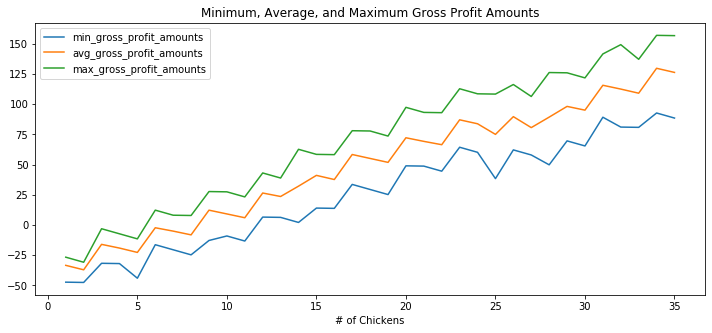

In [203]:
df['min_gross_profit_amounts'].plot(legend = True, figsize = (12,5), 
                                    title = "Minimum, Average, and Maximum Gross Profit Amounts")
df['avg_gross_profit_amounts'].plot(legend = True)
df['max_gross_profit_amounts'].plot(legend = True);

Looking at the chart above, it looks like somewhere between 30-34 chickens is the optimal number in every curve, but let's check.

In [46]:
optimal_chickens = df['min_gross_profit_amounts'].idxmax()
gross_profit = df['min_gross_profit_amounts'].max()
print("The optimal number of chickens is {}, with a minimum gross profit of ${}".format(optimal_chickens, round(gross_profit,2)))

The optimal number of chickens is 34, with a minimum gross profit of $96.64


As you can see from the simulation, more isn't always better. Gross profit appears to dip at 35 chickens. Let's investigate why this is by looking our revenue and then looking at some of our costs. 

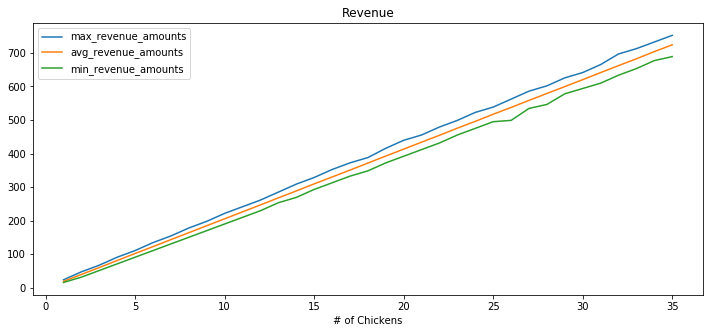

In [107]:
df["max_revenue_amounts"].plot(legend = True, figsize = (12,5), title = "Revenue")
df["avg_revenue_amounts"].plot(legend = True)
df["min_revenue_amounts"].plot(legend = True);

Revenue, as mentioned above, appears to be linear. The more chickens you have, the higher the revenue. Now let's turn our attention to costs, starting with food costs.  

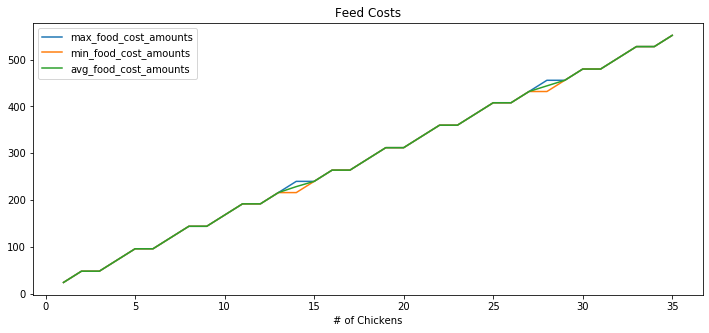

In [106]:
df["max_food_cost_amounts"].plot(legend = True, figsize = (12,5), title = "Feed Costs")
df["min_food_cost_amounts"].plot(legend = True)
df["avg_food_cost_amounts"].plot(legend = True);

A very interesting chart. It appears that there is very little variance between the minimum and maximum cost of feed for almost all values except at intervals of every 15-17 chickens. This makes sense because you can feed a given amount of chickens with a single bag of feed, and then at a certain threshold, you need to buy an additional bag(s). You can easily see the stair step effect in the costs as you reach certain thresholds. It looks like costs stay consistent from 33-34 chickens but increase at 35, which is one of the reasons we see gross profit dip at 35 chickens. Now let's take a look at the bedding costs. 

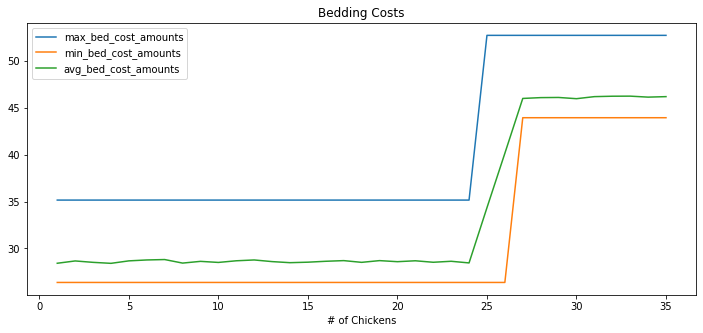

In [239]:
df["max_bed_cost_amounts"].plot(legend = True, figsize = (12,5), title = "Bedding Costs")
df["min_bed_cost_amounts"].plot(legend = True)
df["avg_bed_cost_amounts"].plot(legend = True);

The cost curve above for bedding is somewhat unique (and why it was hard to model). Because the bag of bedding we bought was 10 cubic feet, it covers between 24-26 birds for ~30 days, however, once we pass that bird threshold, we need to additional bags. If we had run this simulation with 51+ chickens, we would have seen another spike between 49-51 chickens. As our simulation was 90 days, we also needed to buy bedding 2-3 additional times to change it when it was soiled, which is demonstrated in the cost jumps which are larger than the cost of a single bag.  

To put a conservative mind to ease, let's also look at the variance of gross profit for each of these simulations. If we see a large variance at 34 birds, it might make sense to choose a different value, because the gross profit could have large swings that would make another option more appealing. 

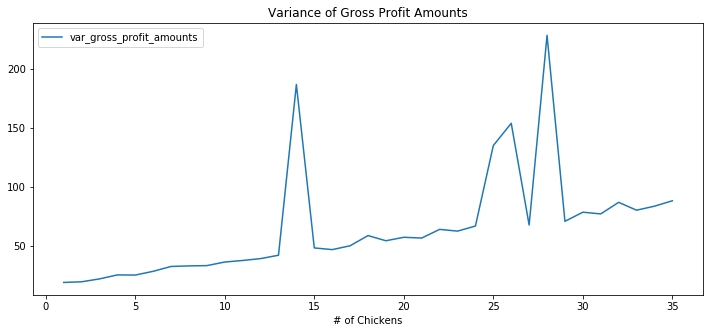

In [105]:
df["var_gross_profit_amounts"].plot(legend = True, figsize = (12,5), title = "Variance of Gross Profit Amounts");

While it does look like there is some significant variance at certain thresholds, which we'd expect, it doesn't look like the variance at 34 chickens is too high. It looks to be around 80-90 dollars, which when we take the square root to get the variance into an unsquared value (standard deviation), it's only $5-8. To ensure we are still selecting the optimal number of chickens at 34 let's do one more sanity check, by taking the square root of the variation to get the standard deviation and subtracting it from the minimum gross profit amount and seeing if 34 chickens still produces the highest gross profit. 

In [70]:
df['std_dev'] = np.sqrt(df['var_gross_profit_amounts'])
df['low_end'] = df["min_gross_profit_amounts"] - df['std_dev']
df['low_end'].idxmax()

34

Even taking variance into account, 34 chickens is still the best number to optimize gross profit. 

Finally, since we stored each of the 1000 runs per chicken in our dictionary, we can do some exploratory analysis of the distributions of the gross profit, revenue, feed cost, and bedding cost of this data at 34 chickens. We'll start by looking at gross profit.

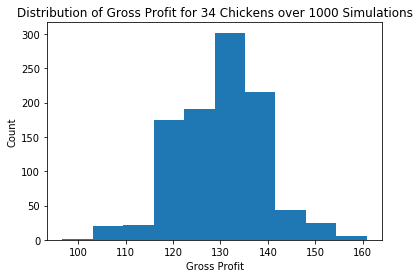

In [115]:
plt.hist(dict_list[0][34])
plt.title("Distribution of Gross Profit for 34 Chickens over 1000 Simulations")
plt.xlabel("Gross Profit")
plt.ylabel("Count");

While in our conservative look at gross profit above showed the minimum at 96 dollars, it looks like that happened incredibly infrequently during the 1000 runs of the simulation. It looks far more likely for the individual to make between 115 dollars and 140 dollars of profit. And since we investigated both the minimum and maximum values at 34 chickens in our gross profit chart above, which were the highest points on the graph for all lines, we can be confident that even at different numbers within the given range (1-35), 34 chickens will give us the highest probability of having the highest gross profit.  

For completeness, let's investigate the distribution of total cost at 34 chickens. 

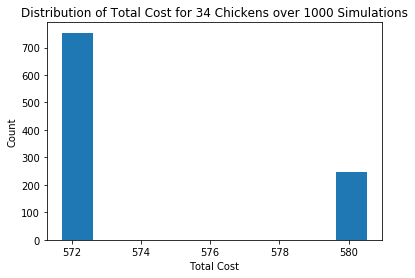

In [117]:
plt.hist(dict_list[4][34])
plt.title("Distribution of Total Cost for 34 Chickens over 1000 Simulations")
plt.ylabel("Count");
plt.xlabel("Total Cost");

As noted above when looking at the line chart of variance, it looks like there is only an $8 difference between the two values in the distribution of the total cost. The difference is probably a single extra bag  of bedding that has to be purchased occasionally based on usage (remember how we built in random usage between a given range in our function). 

## The Answer

In looking at the charts above, we can say with extreme confidence that 34 chickens is the optimal number for our given scenario to maximize gross profit. Additionally, as we saw in the histogram of gross profit above, there is significant potential to make more than the minimum value of 96 dollars. 

## Breakeven Analysis

To continue with our current example, let's say our goal wasn't to maximize profit, but to simply break even, we can find the conservative breakeven point by looking at where gross profit is equal to zero, or another approach would be to look at the minimum revenue curve less the maximum total cost curve and seeing where the two curves converge (which is just a conservative version of gross profit). 

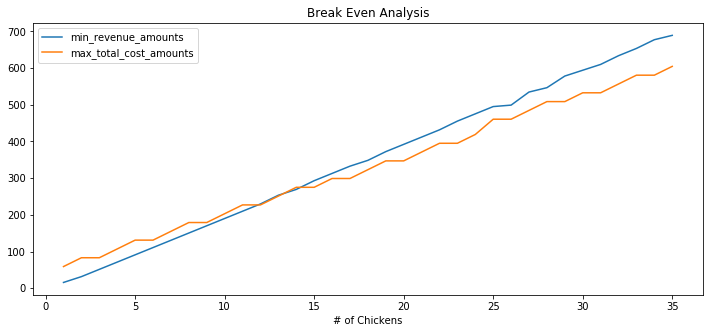

In [122]:
df["min_revenue_amounts"].plot(legend = True, figsize = (12,5), title = "Break Even Analysis");
df["max_total_cost_amounts"].plot(legend = True);

In [130]:
break_even = df["max_total_cost_amounts"] - df["min_revenue_amounts"]
break_even[(break_even > -10) & (break_even < 10)]

# of Chickens
9     8.82
12   -2.60
13   -2.37
14    5.78
dtype: float64

It looks like break even doesn't occur at just one place. It happens at 9 chickens and then again at 14 (with 10-13 going negative again). If you wanted to have the least amount of chickens possible, it would make sense to investigate both the variance and distribution of the data at 9 and 14 chickens to pick the most conservative number. 

## Further Analysis

Because the function has been built to be incredibly flexible and the output to allow for a tremendous amount of analysis, there is a significant amount of "what-if" analysis that could be done. For example, let's say we went ahead and purchased our 34 chickens who are happily producing eggs in line with our model. When at the store buying a bag of organic feed, you look on the shelf and see a "NEW AND IMPROVED" bag of organic feed that costs an extra $6 a bag but promises to increase egg production by at least 5%. Will buying this new bag of feed increase our gross profit or decrease it? Let's check. 

To model this, we'll change the `low_end_chickens` to 34 and the `high_end_chickens` to 34, since we have 34 chickens and don't need to sweep any values. Next we'll need to increase the `yearly_low_end_egg_production` and `yearly_high_end_egg_production` numbers by 5% - going from 235 to 247 and 275 to 289, respectively. Lastly, we'll increase the bag of feed cost from 23.99 to 29.99. 

In [207]:
df1, dict_list1 = chicken_simulation_function(low_end_chickens = 34, 
                                            high_end_chickens = 34, 
                                            by_how_many_chickens = 1 , 
                                            days = 90, 
                                            sale_price = 4.25,
                                            cost_of_carton = 0.29, 
                                            yearly_low_end_egg_production = 247,
                                            yearly_high_end_egg_production = 289,
                                            bag_of_feed_cost = 29.99, 
                                            lbs_of_feed = 35, 
                                            bag_of_bedding_cost = 8.79, 
                                            cubic_feet_of_bedding = 10, 
                                            low_end_days_to_refresh = 28,
                                            high_end_days_to_refresh = 32, 
                                            additional_cost = 0, 
                                            simulations_per_chicken = 1000)

Now that we've run this scenario, we can compare the gross profit with our previous run at our default values and compare the minimum, average, and maximum gross profit so see if this change in feed makes sense. 

In [208]:
import warnings # to hide harmless warnings
warnings.filterwarnings('ignore')

scenario_df = df1[['min_gross_profit_amounts','avg_gross_profit_amounts','max_gross_profit_amounts']]
scenario_df['default_min_gp'] = df['min_gross_profit_amounts'].loc[34]
scenario_df['default_avg_gp'] = df['avg_gross_profit_amounts'].loc[34]
scenario_df['default_max_gp'] = df['max_gross_profit_amounts'].loc[34]

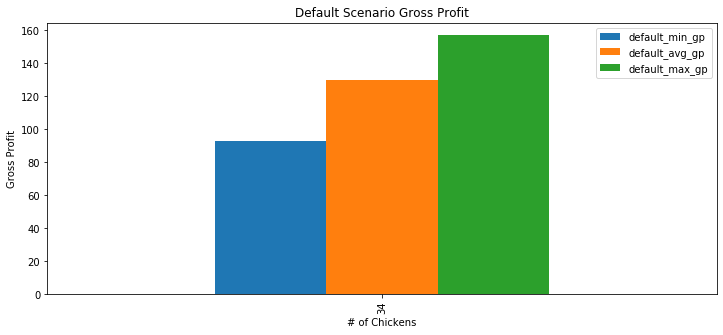

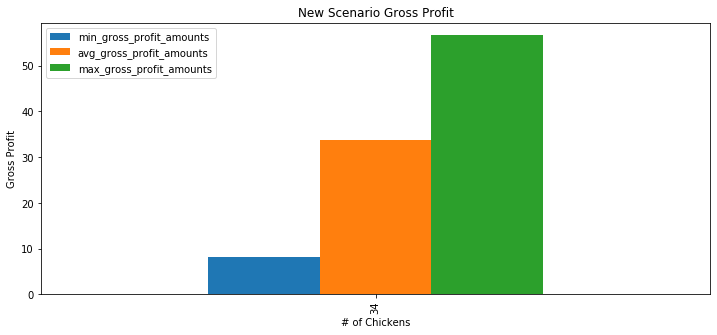

In [209]:
scenario_df[['default_min_gp','default_avg_gp','default_max_gp']].plot.bar(figsize = (12,5),
                                                                           title = "Default Scenario Gross Profit")
plt.ylabel('Gross Profit')
scenario_df[['min_gross_profit_amounts','avg_gross_profit_amounts','max_gross_profit_amounts']].plot.bar(figsize = (12,5),
                                                                                                         title = "New Scenario Gross Profit")
plt.ylabel('Gross Profit');

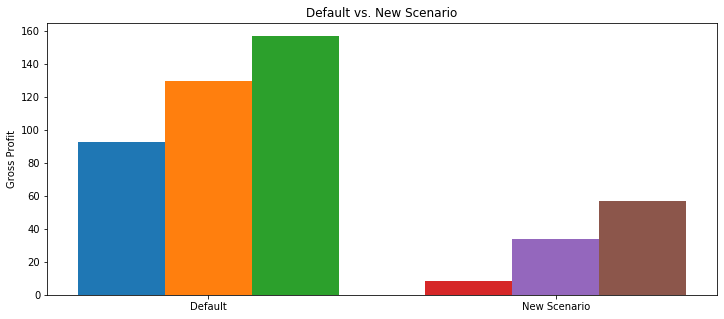

In [235]:
figure = plt.figure(figsize=(12,5))
subplot = figure.add_subplot()

index = 1
width = 1

plt.bar(index, scenario_df['default_min_gp'], width)
plt.bar(index + 1, scenario_df['default_avg_gp'], width)
plt.bar(index + 2, scenario_df['default_max_gp'], width)


plt.bar(index + 4, scenario_df['min_gross_profit_amounts'], width)
plt.bar(index + 5, scenario_df['avg_gross_profit_amounts'], width)
plt.bar(index + 6, scenario_df['max_gross_profit_amounts'], width)

plt.Axes.set_xticks(subplot, ticks = [2, 6])
plt.Axes.set_xticklabels(subplot, labels=["Default", "New Scenario"])
plt.title("Default vs. New Scenario")
plt.ylabel("Gross Profit");


Based on the two charts above, it looks like the gross profit in every instance, the minimum, average, and maximum is higher in our default scenario than in the new scenario. We can tell from this chart that the maximum value of the new scenario doesn't even reach the minimum value of gross profit in our default scenario, so we know that in every instance and with include life like variation, buying this new bag of feed would be a poor choice. You can see in the distribution below, the blue histogram, which is the new scenario, is much farther to the left than our default scenario, the orange histogram.  

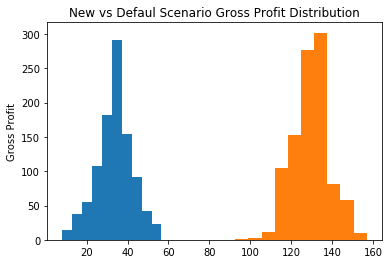

In [237]:
plt.hist(dict_list1[0][34]);
plt.hist(dict_list[0][34]);
plt.title("New vs Defaul Scenario Gross Profit Distribution")
plt.ylabel("Gross Profit");

**In summary - DON'T BUY THE NEW BAG OF FEED!**

## Next Steps and Futher Analysis

The next steps for this project would be to build an R Shiny or Python Dash front end that a user could easily just drop values into to do their analysis. This would provide a nice clean UI for someone without a programming background to be able to run the simulation at the click of a button. 

This simulation tool is extremely flexible, we could just have easily modeled a "what if" scenario to decide whether to buy a more expensive bag of bedding that boasts less frequent bedding changes. Not only can it help the organic egg enthusiast looking to break into the game by modeling their best scenario, it can help current individuals, who are already in the game, in their "what if" analysis questions. 

## Presentation Material

* [Slide deck](https://1drv.ms/p/s!AslqVAwJ4E4cg9EdJPqvpiUsASO3sg?e=znk2xU)
* [YouTube Presentation of Final Project](https://youtu.be/jWP_i-fxJLA)